In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [14]:
sra_run = pd.read_csv('../SraRunInfo.csv')
sra_map = sra_run[['Run', 'SampleName']]

In [24]:
# reference-based transrate evaluation
file_dib_v_ncgr = "../assembly_evaluation_data/transrate_reference_scores_nt.csv"
file_ncgr_v_dib = "../assembly_evaluation_data/transrate_reverse_scores_nt.csv"

#busco evaluation
file_ncgr_busco = "../assembly_evaluation_data/busco_scores_imicrobe.csv"
file_dib_busco = "../assembly_evaluation_data/busco_scores_MMETSP.csv"

# transrate scores
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores.csv"
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_imicrobe_scores.csv"

           

In [59]:
# Load in df and add the mmetsp/sra information
dib_v_ncgr = pd.read_csv(file_dib_v_ncgr)
dib_v_ncgr = pd.merge(sra_map, dib_v_ncgr, on='Run')
ncgr_v_dib = pd.read_csv(file_ncgr_v_dib)
ncgr_v_dib = pd.merge(sra_map, ncgr_v_dib, on='SampleName')

ncgr_busco = pd.read_csv(file_ncgr_busco)
ncgr_busco = pd.merge(sra_map,ncgr_busco,on="SampleName")

dib_busco = pd.read_csv(file_dib_busco)
dib_busco = pd.merge(sra_map,dib_busco,on="Run")

ncgr_transrate = pd.read_csv(file_ncgr_transrate_scores)
ncgr_transrate = pd.merge(sra_map,ncgr_transrate,on="SampleName")

dib_transrate = pd.read_csv(file_dib_transrate_scores)
dib_transrate = pd.merge(sra_map,dib_transrate,on="Run")

In [60]:
ncgr_busco.head()

,Run,SampleName,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
0,SRR1300443,MMETSP1353,141,42,246,429,0.328671
1,SRR1300444,MMETSP1354,95,51,283,429,0.221445
2,SRR1300445,MMETSP1345,180,39,210,429,0.419580
3,SRR1300446,MMETSP1322,179,56,194,429,0.417249
4,SRR1300447,MMETSP1174,231,56,142,429,0.538462


In [61]:
dib_busco.head()

,Run,SampleName,Unnamed: 0,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
0,SRR1300443,MMETSP1353,Erythrolobus_australicus_SRR1300443,161,72,196,429,0.375291
1,SRR1300444,MMETSP1354,Erythrolobus_madagascarensis_SRR1300444,135,70,224,429,0.314685
2,SRR1300445,MMETSP1345,Fabrea_salina_SRR1300445,283,34,112,429,0.659674
3,SRR1300446,MMETSP1322,Minutocellus_polymorphus_SRR1300446,191,69,169,429,0.445221
4,SRR1300447,MMETSP1174,Dictyocha_speculum_SRR1300447,225,73,131,429,0.524476


In [62]:
ncgr_transrate.head()

,Run,SampleName,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
0,SRR1300443,MMETSP1353,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,7144,150,13611,7613157,1052.32643,549,3028,...,0.65496,15,0.00210,2820,0.39474,464,0.06495,0.28641,0.33978,0.32779
1,SRR1300444,MMETSP1354,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,7230,150,9759,6945606,941.82531,783,2657,...,0.64716,13,0.00180,2237,0.30941,520,0.07192,0.22521,0.27521,0.35183
2,SRR1300445,MMETSP1345,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,7765,150,13569,9565389,1226.15699,254,3939,...,0.56613,2,0.00026,746,0.09607,1106,0.14243,0.30437,0.31185,0.32558
3,SRR1300446,MMETSP1322,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,14799,150,7647,13880697,918.65315,1643,5496,...,0.68890,48,0.00324,6127,0.41401,727,0.04912,0.26267,0.30848,0.38362
4,SRR1300447,MMETSP1174,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,27278,150,9579,20416083,723.31520,3949,6734,...,0.71468,134,0.00491,11791,0.43225,2170,0.07955,0.12535,0.16331,0.27294


In [63]:
dib_transrate.head()

,Run,SampleName,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
0,SRR1300443,MMETSP1353,/mnt/scratch/ljcohen/mmetsp/Erythrolobus_austr...,14363,201,17808,12557848,874.31929,0,4455,...,0.31066,95,0.00661,9700,0.67535,814,0.05667,0.39229,0.40475,0.02722
1,SRR1300444,MMETSP1354,/mnt/scratch/ljcohen/mmetsp/Erythrolobus_madag...,13681,201,8496,12107327,884.97383,0,4146,...,0.30371,106,0.00775,8379,0.61246,901,0.06586,0.35189,0.36723,0.03236
2,SRR1300445,MMETSP1345,/mnt/scratch/ljcohen/mmetsp/Fabrea_salina/SRR1...,14472,201,13624,16143120,1115.47264,0,6035,...,0.27204,46,0.00318,4426,0.30583,1792,0.12383,0.43613,0.44711,0.02345
3,SRR1300446,MMETSP1322,/mnt/scratch/ljcohen/mmetsp/Minutocellus_polym...,26767,201,6638,21112210,788.74024,0,7106,...,0.31946,165,0.00616,17996,0.67232,941,0.03516,0.36034,0.43550,0.41542
4,SRR1300447,MMETSP1174,/mnt/scratch/ljcohen/mmetsp/Dictyocha_speculum...,58186,201,8804,37663791,647.29988,0,10892,...,0.33295,621,0.01067,39458,0.67814,2612,0.04489,0.25335,0.33796,0.41557


In [64]:
#Set indexing value
ncgr_v_dib = ncgr_v_dib.set_index('Run')
dib_v_ncgr = dib_v_ncgr.set_index('Run')
dib_busco = dib_busco.set_index('Run')
ncgr_busco = ncgr_busco.set_index('Run')
dib_transrate = dib_transrate.set_index('Run')
ncgr_transrate = ncgr_transrate.set_index('Run')

dib_v_ncgr = dib_v_ncgr.drop_duplicates()
ncgr_v_dib = ncgr_v_dib.drop_duplicates()
dib_busco = dib_busco.drop_duplicates()
ncgr_busco = ncgr_busco.drop_duplicates()
dib_transrate = dib_transrate.drop_duplicates()
ncgr_transrate = ncgr_transrate.drop_duplicates()

### Plotting functions 


In [65]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

## Checking out different variables reported by transrate

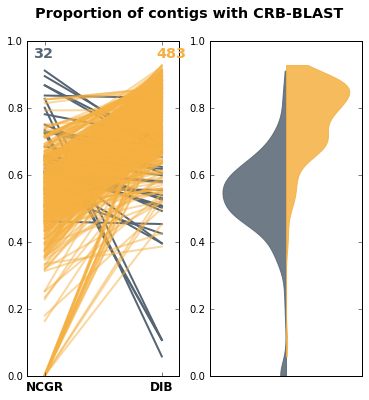

In [66]:
p_refs_with_CRBB, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

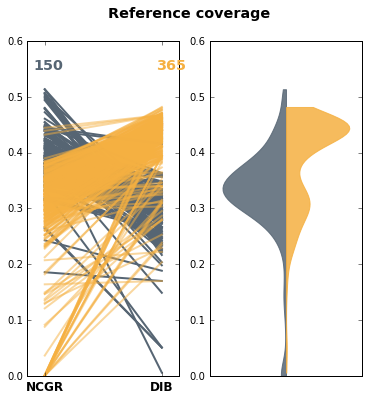

In [67]:
reference_coverage, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.6, ypos = 0.55)

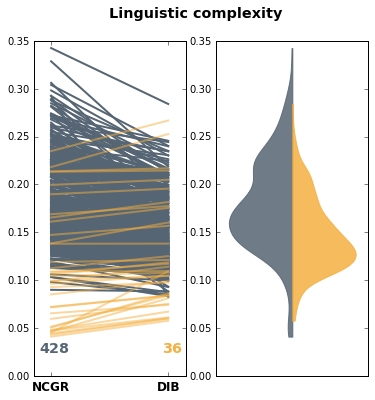

In [68]:
linguistic_complexity, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'linguistic_complexity', 'Linguistic complexity', ymax=0.35, ypos=0.025)

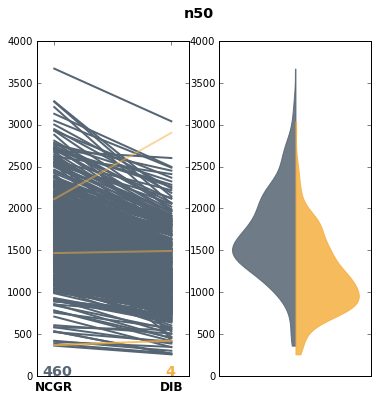

In [69]:
n50, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n50', 'n50', ymax=4000)

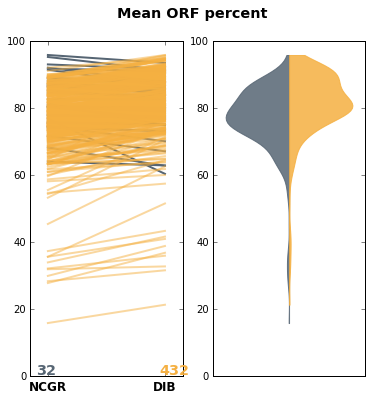

In [70]:
mean_orf_percent, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

# Comparing BUSCO scores

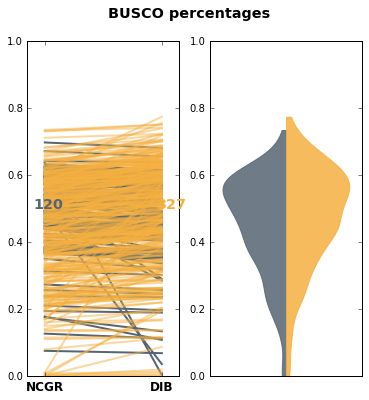

In [78]:
busco_scores, fig, ax = create_plots(ncgr_busco,dib_busco,'Complete_BUSCO_perc', 'BUSCO percentages',ymax=1.0, ypos=0.5)

# Comparing Transrate scores

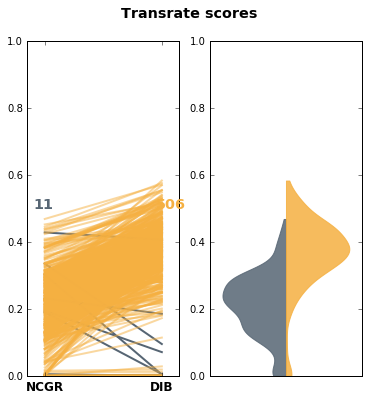

In [79]:
score,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'score', 'Transrate scores',ymax=1.0, ypos=0.5)